In [40]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [41]:
# 1. Cargar los datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [42]:
# 2. Preprocesamiento de los datos
# Redimensionamos los datos para que tengan un canal (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32')

# Normalizamos los valores de los píxeles a un rango de [0,1]
train_images /= 255.0
test_images /= 255.0

# Convertimos las etiquetas en categorías one-hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [43]:
# 3. Crear el modelo CNN
model = Sequential()

# Primera capa convolucional con 32 filtros de tamaño 3x3 y activación ReLU
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))  # Capa de MaxPooling

# Segunda capa convolucional con 64 filtros de tamaño 3x3 y activación ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional con 64 filtros de tamaño 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

# Capa de aplanamiento
model.add(Flatten())

# Capa completamente conectada con 64 neuronas y activación ReLU
model.add(Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una por cada dígito) y activación softmax
model.add(Dense(10, activation='softmax'))


C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# 4. Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# 5. Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8552 - loss: 0.4704 - val_accuracy: 0.9811 - val_loss: 0.0626
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9797 - loss: 0.0605 - val_accuracy: 0.9845 - val_loss: 0.0524
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9875 - loss: 0.0389 - val_accuracy: 0.9853 - val_loss: 0.0499
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9889 - val_loss: 0.0393
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9927 - loss: 0.0209 - val_accuracy: 0.9878 - val_loss: 0.0402


In [46]:
# 6. Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Precisión en los datos de prueba: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0407
Precisión en los datos de prueba: 0.9901


In [47]:
# 7. Predecir las etiquetas de las imágenes de prueba
predictions = model.predict(test_images)

# Convertir las predicciones a etiquetas
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [48]:
# 8. Imprimir el informe de clasificación (precision, recall, f1-score)
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [49]:
# 9. Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

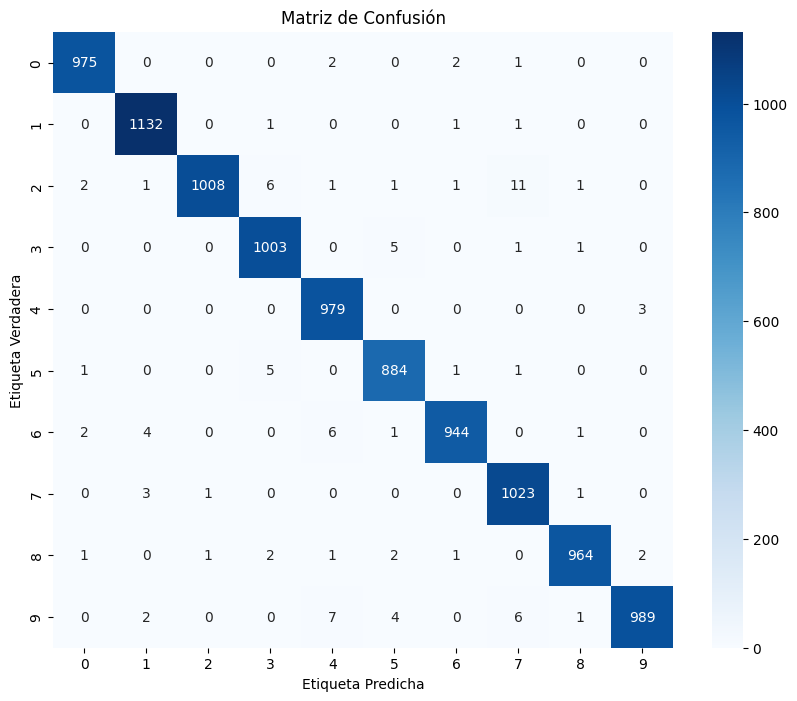

In [50]:
# 10. Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

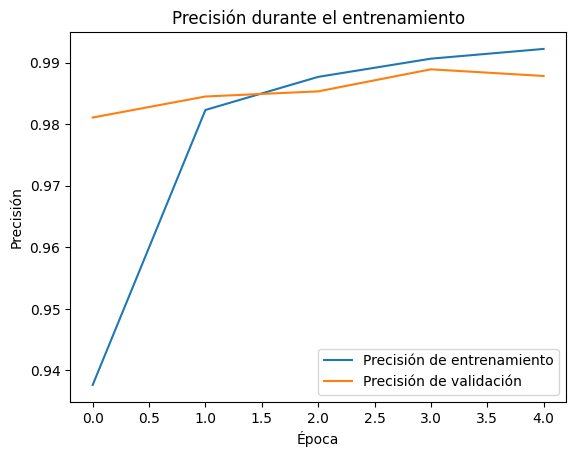

In [51]:
# 11. Graficar la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

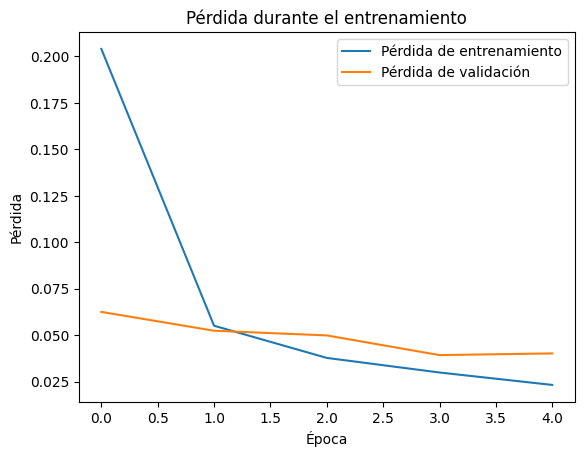

In [52]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
